# [TEMPLATE] DATASET DEPURADO

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

<hr>

# Correlacion: Precio por Ciudad

- **Categoria:** `Ciudad`.
- **Objetivo:** Investigar cual es la ciudad mas cara y cual la mas barata.

In [87]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

In [88]:
df['ciudad'].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
                                 ...  
Cocula                               1
Villa de Cos                         1
CopAndaro                            1
San Antonio de la Cal                1
Nanacamilpa de Mariano Arista        1
Name: ciudad, Length: 875, dtype: int64

In [89]:
# Vamos a buscar cuales son las 10 ciudades mas caras y cuales son las 10 mas baratas:

In [120]:
ciudades = df.copy()
ciudades = ciudades[['ciudad', 'tipodepropiedad', 'precio']]

In [121]:
ciudades['tipodepropiedad'] = ciudades['tipodepropiedad'].transform(lambda x: x if x in ['Casa', 'Apartamento'] else 'Otros')

In [122]:
# Nos interesa quedarnos con las ciudades que tengan al menos 100 publicaciones para evitar outliers.

In [123]:
ciudades = ciudades.groupby(['ciudad', 'tipodepropiedad'])['precio'].agg(['mean', 'count'])
ciudades = ciudades.loc[ciudades['count'] > 100][['mean']]

In [124]:
# Ahora buscamos ciudades caras segun tipo de propiedad

### 10 ciudades mas caras para tipo de propiedad Casa

In [125]:
ciudades = ciudades.unstack()

In [126]:
ciudades

mean                            
tipodepropiedad      Apartamento          Casa         Otros
ciudad                                                      
Acapulco de Juárez  2.976989e+06  2.018941e+06  1.922547e+06
Aguascalientes               NaN  1.477098e+06  1.752961e+06
Ahome                        NaN  1.182244e+06           NaN
Altamira                     NaN  1.619460e+06           NaN
Alvarado                     NaN  2.647220e+06  1.272970e+06
...                          ...           ...           ...
Xochitepec                   NaN  1.460680e+06  1.100671e+06
Yautepec                     NaN  1.828984e+06  1.355964e+06
Zamora                       NaN  1.225101e+06           NaN
Zapopan             2.345440e+06  2.804997e+06  2.794344e+06
Zumpango                     NaN  5.723822e+05           NaN

[133 rows x 3 columns]

In [128]:
ciudades.columns = ['Apartamento', 'Casa', 'Otros']

In [164]:
casas_caras = ciudades['Casa'].nlargest(10).to_frame().astype(int).rename(columns={'Casa':'precio'})
apart_caros = ciudades['Apartamento'].nlargest(10).to_frame().astype(int).rename(columns={'Apartamento':'precio'})
casas_baratas = ciudades['Casa'].nsmallest(10).to_frame().astype(int).rename(columns={'Casa':'precio'})
apart_baratos = ciudades['Apartamento'].nsmallest(10).to_frame().astype(int).rename(columns={'Apartamento':'precio'})

In [165]:
casas_caras

,precio
ciudad,
San Pedro Garza García,7690082
Huixquilucan,6786958
Miguel Hidalgo,5227265
Alvaro Obregón,5101218
Benito Juárez,4867338
Cuajimalpa de Morelos,4846785
La Magdalena Contreras,4762665
Valle de Bravo,4665715
Cuauhtémoc,4523777


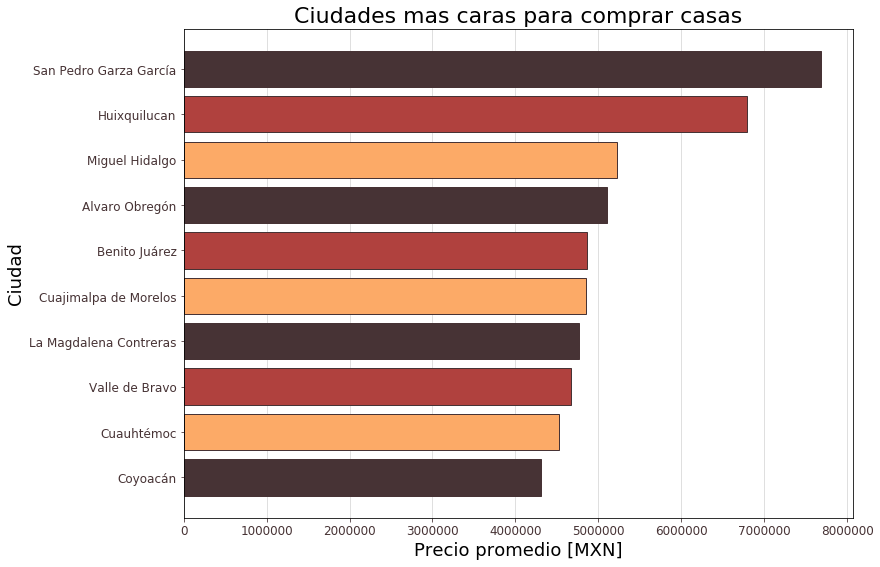

In [228]:
ciudades = casas_caras.index.to_list()[::-1]
precios = casas_caras['precio'].to_list()[::-1]

plt.rc('axes', axisbelow=True)

#colores = [marron, azul, rojo, amarillo, verde, marron, azul, rojo, amarillo, verde][::-1]
colores = [marron, rojo, amarillo, marron, rojo, amarillo, marron, rojo, amarillo, marron][::-1]

plt.figure(figsize=(12,9))
plt.barh(ciudades, precios, color=colores, edgecolor=marron)
plt.title("Ciudades mas caras para comprar casas", fontsize=22)
plt.xlabel("Precio promedio [MXN]", fontsize=18)
plt.ylabel("Ciudad", fontsize=18)
plt.grid(True, axis='x')

plt.tick_params(colors=marron, grid_alpha=0.5, labelsize=12)

plt.savefig("ciudades mas caras para casas.png", transparent=True, bbox_inches='tight')

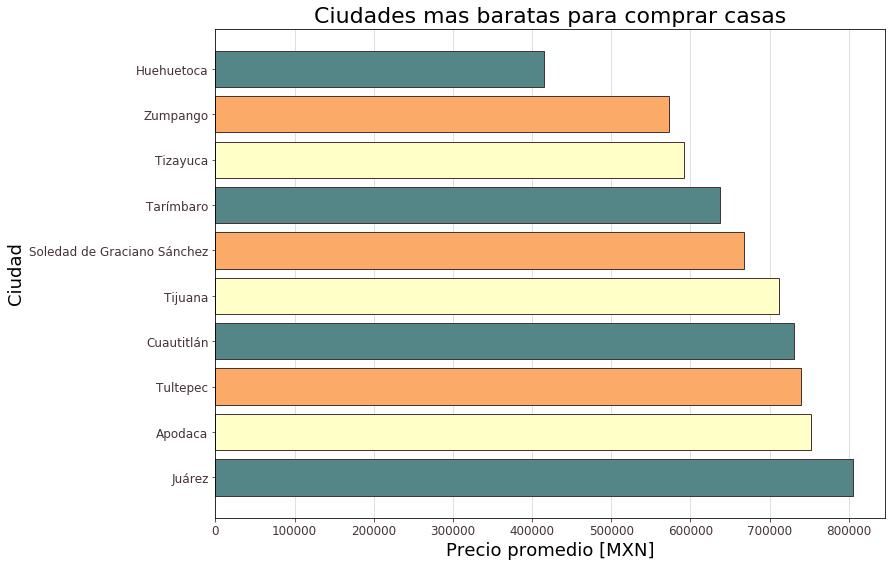

In [235]:
ciudades = casas_baratas.index.to_list()[::-1]
precios = casas_baratas['precio'].to_list()[::-1]

plt.rc('axes', axisbelow=True)

#colores = [marron, azul, rojo, amarillo, verde, marron, azul, rojo, amarillo, verde][::-1]
colores = [azul, amarillo, verde, azul, amarillo, verde, azul, amarillo, verde, azul][::-1]

plt.figure(figsize=(12,9))
plt.barh(ciudades, precios, color=colores, edgecolor=marron)
plt.title("Ciudades mas baratas para comprar casas", fontsize=22)
plt.xlabel("Precio promedio [MXN]", fontsize=18)
plt.ylabel("Ciudad", fontsize=18)
plt.grid(True, axis='x')

plt.tick_params(colors=marron, grid_alpha=0.5, labelsize=12)

plt.savefig("ciudades mas baratas para casas.png", transparent=True, bbox_inches='tight')

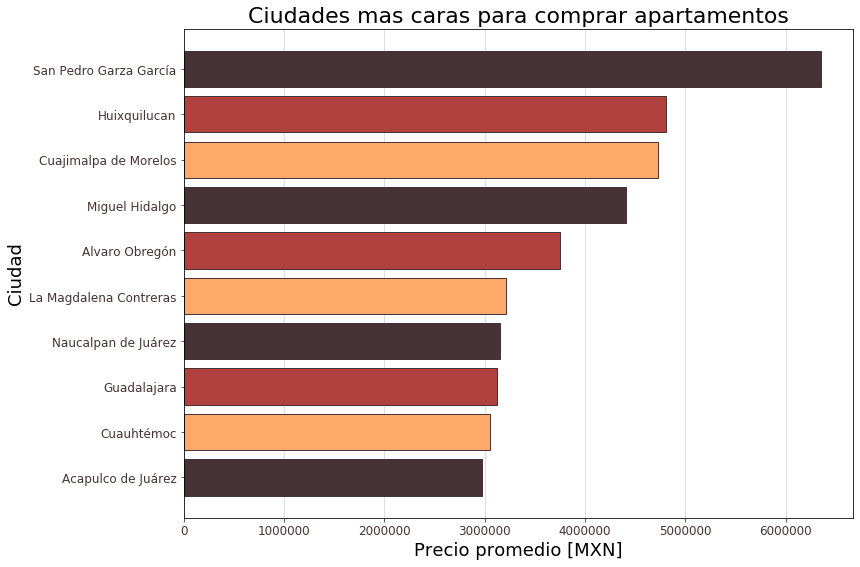

In [237]:
ciudades = apart_caros.index.to_list()[::-1]
precios = apart_caros['precio'].to_list()[::-1]

plt.rc('axes', axisbelow=True)

#colores = [marron, azul, rojo, amarillo, verde, marron, azul, rojo, amarillo, verde][::-1]
colores = [marron, rojo, amarillo, marron, rojo, amarillo, marron, rojo, amarillo, marron][::-1]

plt.figure(figsize=(12,9))
plt.barh(ciudades, precios, color=colores, edgecolor=marron)
plt.title("Ciudades mas caras para comprar apartamentos", fontsize=22)
plt.xlabel("Precio promedio [MXN]", fontsize=18)
plt.ylabel("Ciudad", fontsize=18)
plt.grid(True, axis='x')

plt.tick_params(colors=marron, grid_alpha=0.5, labelsize=12)

plt.savefig("ciudades mas caras para apart.png", transparent=True, bbox_inches='tight')


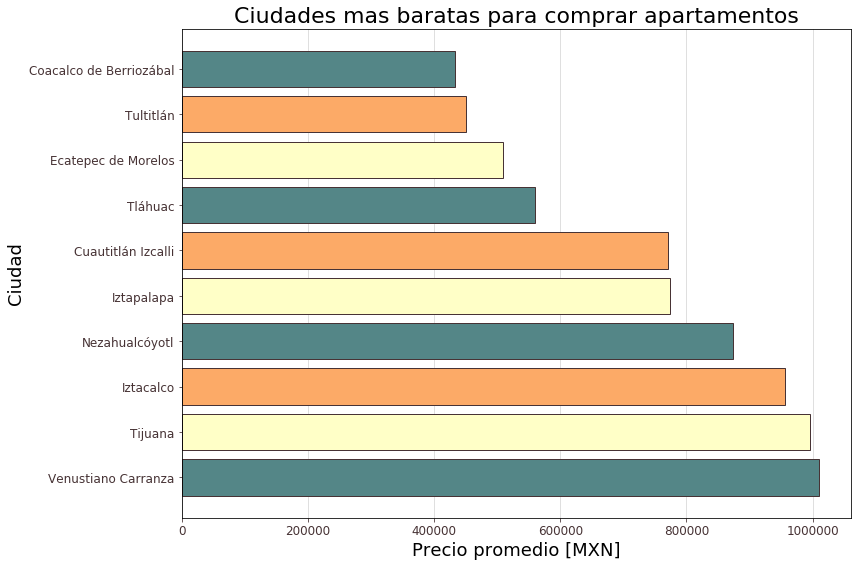

In [238]:
ciudades = apart_baratos.index.to_list()[::-1]
precios = apart_baratos['precio'].to_list()[::-1]

plt.rc('axes', axisbelow=True)

#colores = [marron, azul, rojo, amarillo, verde, marron, azul, rojo, amarillo, verde][::-1]
colores = [azul, amarillo, verde, azul, amarillo, verde, azul, amarillo, verde, azul][::-1]

plt.figure(figsize=(12,9))
plt.barh(ciudades, precios, color=colores, edgecolor=marron)
plt.title("Ciudades mas baratas para comprar apartamentos", fontsize=22)
plt.xlabel("Precio promedio [MXN]", fontsize=18)
plt.ylabel("Ciudad", fontsize=18)
plt.grid(True, axis='x')

plt.tick_params(colors=marron, grid_alpha=0.5, labelsize=12)

plt.savefig("ciudades mas baratas para apart.png", transparent=True, bbox_inches='tight')